# Alerts

In [2]:
"""
目前有个毛病 远程连接内核总是启动不了
此时需要切回base 成功执行一个指令 比如a=1之类 然后再给切换回来
注意这不是环境的切换 而是选择哪一个环境里的解释器
再者并不是百试百灵的 可能需要来回切换反复执行 最终是能好的
究其缘由 似乎是一个依赖包出了问题 可能需要对其降级
但是需要慎重 别整完百分百不好使 那就耽误事了

顺便一提 打开多个远程窗口 不能共同使用同一个解释器 
这个选了那个就断 断了之后还得再走一遍上述流程 非常麻烦 所以准备多个环境其实很有必要

"""


"""
我比较担心数据的泄露 同一天的序列间多数帧是重复的 
现在的数据集就这么构建的 若想调整需要时间 暂时顾不上了
而且再想一下 这应该不算是数据泄露才对 
再者这么训练 会不会反而有优势 ⁉️ 

"""


"""
from datetime import timedelta
这个在下载时没用上 可能需要调整 
但再一想 或许只是保存时间戳字符串就已经足够了 
等到用的时候现去计算差值 可能更好一些
不然比如绘图之时 只有时间差值而没有绝对值 这就没法标时

注意 雷达采样其实并不完全均匀 
第一天数据就是均匀的 但最后一天的却是不均匀的
另外也有同一天内 多数均匀少数不均匀 甚至缺值这种情况

"""

'\nfrom datetime import timedelta\n这个在下载时没用上 可能需要调整 \n但再一想 或许只是保存时间戳字符串就已经足够了 \n等到用的时候现去计算差值 可能更好一些\n不然比如绘图之时 只有时间差值而没有绝对值 这就没法标时\n\n注意 雷达采样其实并不完全均匀 \n第一天数据就是均匀的 但最后一天的却是不均匀的\n另外也有同一天内 多数均匀少数不均匀 甚至缺值这种情况\n\n'

# Configuration

In [3]:
"""
在学校的服务器上 我只被分配了32GB 这点存储空间根本就不够用
所以说雷达数据的下载 绘图以及保存 全都要去colab上面完成 顺便节约个人硬件
也幸好colab能挂载google drive 处理好的图片即时就能存入 否则断线清空还是个大麻烦

图片处理完毕 还需要将之从云盘下载到本机 再手动传入学校服务器
在学校的服务器上直接挂载谷歌云盘进而完成图片下载似乎是实现不了的
除了colab以及kaggle能用api 其它的服务器貌似都不可以
而在学校的服务器上安装谷歌云盘的应用 对于远程连接又非常不友好 传图形界面实在太卡了
所以只好手动上传 幸亏训练数据总是相对不变 上传一次基本就一劳永逸了

后来发现vscode有个插件 google drive for vscode
但是经过测试 只能下载单个文件 甚至不能多选下载 所以也是鸡肋一个

"""


"""
这是关于训练数据 至于代码部分 则会选择用git并发布到github备份与管理
设置.gitignore忽略.ipynb_checkpoint以及__pychache__

在colab里 用命令行指令克隆代码仓库 即可获取最新代码
最简单方式是!git clone <repo_url>
代码修改之后再推送就好了 我们完全能在colab里面自由使用git
https://www.geeksforgeeks.org/how-to-install-and-use-git-in-google-colab

注意克隆之后不要去打开仓库里的笔记本 那只会打开新的标签页 根本无法交互执行
还得手动往当前的笔记本里复制代码 非常麻烦
所以最好是用当前的笔记本执行仓库脚本 比如%run test.py (亦可写成%run test)
注意此时需要使用魔法指令 因为需要执行结果全局继承 详见下文

如果只需打开仓库的笔记本 亦即代码没有使用额外数据或者模块
甚至若仓库里除笔记本之外并无其它文件
那此时不必克隆仓库了 因为colab允许在打开笔记本时就直接搜索github仓库
这显然是更简便的操作方式 但此时提交版本该怎么操作 ⁉️
https://blog.csdn.net/yhblog/article/details/121534768

"""

# 在ipython里 执行命令行指令 需要前引一个叹号 但可往后缀加空格 比如!pwd 或者! pwd
# 但是执行ipython魔法指令 百分号后务必不能缀加空格 只有%pwd 没有% pwd 

# 魔法指令乃是ipython所独有的指令 又被称为魔法命令 (magic command) 算是特殊的命令行命令 
# 要特别强调勿与python魔法函数相混淆
# 较之于普通命令行指令 它的特殊之处在于 能够全局继承指令执行结果 否则一执行完shell就自动关闭了
# 典型案例就是cd 只有使用%cd而非!cd才有效果
# 别看命令主体相同 但是有着本质区别
# 再比如说run 只有%run并无!run 亦即根本就没有run这一命令行指令

# 除了!之外 选择使用os或者subprocess更加规范 详见下文
# 因为便于代码移植 并不要求必须使用ipython
#
# 对于前例 虽然没有!run 但有subprocess.call('python test.py', shell=True)
# 或者os.system('python test.py')以及os.popen('python test.py') 仍然需要详见下文
# 但都如前所述无法使笔记本继承执行结果 故而并不建议使用

# 补充一点 ipython如何执行多条命令行的语句
# 1)
# command1; command2; command3
# 叹号可被省略这点 从这里就能看出迹象了 这点之前没有提及 需要补充 ⁉️
# 此外os或者subprocess也可以这样执行多语句
# 2)
# !command1
# !command2
# !command3
# 3)
# %%bash (将整个单元格放入终端运行)
# command1
# command2
# command3

"""
另外 远程连接服务器时 需要修改ssh相关配置
OpenSSH客户端有两小时的超时设定 若会话的空闲时间超过这一限制 远程连接就会中断
所以需要手动向服务器上ssh配置文件中添加如下内容

Host * 
	ServerAliveInterval 1800 
	ServerAliveCountMax 48

这将使客户端每隔60秒就向服务器发送一次空数据包 并允许最多发送10个这样的数据包
如果始终无法收到响应 才会自动断开连接
实际上就是修改了客户端的默认行为 拉长了允许的闲置时间而已

"""

'\n另外 远程连接服务器时 需要修改ssh相关配置\nOpenSSH客户端有两小时的超时设定 若会话的空闲时间超过这一限制 远程连接就会中断\n所以需要手动向服务器上ssh配置文件中添加如下内容\n\nHost * \n\tServerAliveInterval 1800 \n\tServerAliveCountMax 48\n\n这将使客户端每隔60秒就向服务器发送一次空数据包 并允许最多发送10个这样的数据包\n如果始终无法收到响应 才会自动断开连接\n实际上就是修改了客户端的默认行为 拉长了允许的闲置时间而已\n\n'

In [4]:
"""
这是一段废弃代码 用于读取云盘中的配置文件
之所以还保留 则是因为上面还有学习笔记

以前的方案是 代码存进谷歌云盘 进入colab之后 通过挂载云盘实现脚本访问
但由于代码修改不直接发生在云盘里 所以每次更新都要上传一遍
而我经常遗忘这点 故而总是在旧代码上继续做修改 最终不胜折磨还是特意学了git

"""


'''
import os

if use_colab:
    from google.colab import drive
    # 如前所述 这个api只对colab或者kaggle好使
    # 其它服务器就挂载不了 即便已安装了模块google
    
    mount_dir = '/content/drive'
    # 这是默认挂载路径 并不建议更改 以便代码移植
    drive.mount(mount_dir)
    # 挂载之后并未进入挂载路径 (cd) 
    # 因为现在只需要读 无需往云盘里写文件 

    rel_path = "MyDrive/MyProjects/Weather Nowcasting/XMB-7/arguments.py"
    # 云盘中的配置文件所在路径
    file_path = os.path.join(mount_dir, rel_path)

    %run $file_path
    # 不能直接使用格式化字符串
    # 其实这也挺奇怪的 ipython定义魔法函数居然参照的是bash 也就是命令行的样式 而非python语法 ⁉️
    # 顺便一提 这里甚至不能在句尾加分号 因为这种注释语法也是属于python

else:
    %run _1_arguments
    # 关于argparse 还是要学习到底怎么用
    # 这个名不必起成这样了 ⁉️

'''

'\nimport os\n\nif use_colab:\n    from google.colab import drive\n    # 如前所述 这个api只对colab或者kaggle好使\n    # 其它服务器就挂载不了 即便已安装了模块google\n    \n    mount_dir = \'/content/drive\'\n    # 这是默认挂载路径 并不建议更改 以便代码移植\n    drive.mount(mount_dir)\n    # 挂载之后并未进入挂载路径 (cd) \n    # 因为现在只需要读 无需往云盘里写文件 \n\n    rel_path = "MyDrive/MyProjects/Weather Nowcasting/XMB-7/arguments.py"\n    # 云盘中的配置文件所在路径\n    file_path = os.path.join(mount_dir, rel_path)\n\n    %run $file_path\n    # 不能直接使用格式化字符串\n    # 其实这也挺奇怪的 ipython定义魔法函数居然参照的是bash 也就是命令行的样式 而非python语法 ⁉️\n    # 顺便一提 这里甚至不能在句尾加分号 因为这种注释语法也是属于python\n\nelse:\n    %run _1_arguments\n    # 关于argparse 还是要学习到底怎么用\n    # 这个名不必起成这样了 ⁉️\n\n'

In [5]:
"""
导入参数配置

这里是特意把少部分参数单独拎出来 这样就不必再额外去打开配置文件了
笔记本上直接能改

"""

use_colab = False
# 若用colab 则要进行仓库克隆
# 但要注意 仓库里面并无数据以及日志 因为仓库只包含了src
# 若想访问还要挂载谷歌云盘
use_g4 = True
# 若用学校的linuxg4这一服务器 则要额外配置一下gpu
# 另外还需拉取最新代码
assert not (use_colab and use_g4), \
"use_colab and use_g4 should not both be equal to rrue."
# 只要不同为真即可 
# 双假则意味着使用其它主机

skip_download = True
# 跳过数据下载 若已完成的话
skip_plot = True
# 跳过图像绘制 若已完成的话

import os
repo_url = 'https://github.com/xmb-7/src'
# 若拉取代码使用不上该变量的话 就塞到分支里面去 ⁉️
if use_colab:
    # 挂载谷歌云盘 >
    mount_dir = '/content/drive'
    if not os.path.exists(mount_dir):  
        from google.colab import drive
        drive.mount(mount_dir)
        # 注意云盘里面 相关资源比如数据或者日志 是只有上传过才会有
        # 通过代码挂载需要多次确认 不如直接点击左侧图标按钮 ⁉️

    # 克隆仓库 > 
    root_dir = '/content/src'
    if not os.path.exists(root_dir):
        os.system(f'git clone {repo_url}')
    
    # 修改工作路径 >
    os.chdir(root_dir)

elif use_g4:
    # 拉取最新代码 >
    pass
    # 暂时不知道怎么用代码拉取仓库最新版本代码
    # 主要是不知怎么用git ⁉️

    # 修改工作路径 >
    root_dir = '/net/nasstore/students/UNGRAD/UE/xbai/home/MyThesis/src'
    os.chdir(root_dir)
    # 其实可以把它拿到分支外面 但个人感觉可读性不佳

# 导入参数配置 >
%run _1_arguments
# 仅仅支持ipython 
# 其余场合需要手动在终端里执行脚本 详见下文

'''
try: %run _1_arguments
# 这种写法报错 
# 如前所述python和ipython不能混用
except: "please run the argument script by hand"
# 注意 配置文件不能import 其中参数只有在终端里才能生成
# 如果用的不是ipython 没有%run可用 这可咋办 
# 直接在终端里执行脚本即可 不用ipython就好
#
# 注意模块名不能以数字开头 若将之起为1_arguments则无法导入
# 所以为了文件系统能够排序 只好起这种名 
# 这是最初以为可以导入时的方案 现在虽不能导入了 但对其它模块同理

'''

'\ntry: %run _1_arguments\n# 这种写法报错 \n# 如前所述python和ipython不能混用\nexcept: "please run the argument script by hand"\n# 注意 配置文件不能import 其中参数只有在终端里才能生成\n# 如果用的不是ipython 没有%run可用 这可咋办 \n# 直接在终端里执行脚本即可 不用ipython就好\n#\n# 注意模块名不能以数字开头 若将之起为1_arguments则无法导入\n# 所以为了文件系统能够排序 只好起这种名 \n# 这是最初以为可以导入时的方案 现在虽不能导入了 但对其它模块同理\n\n'

# GPU Check

### GPU Status

In [6]:
'''
import os

f = os.popen('nvidia-smi')
print(f.read())

'''

# 亦可选择直接执行!nvidia-smi
# 但这会局限于ipython

# 不要使用os.system('!nvidia-smi')
# 语句虽能正常执行 但根本看不到相应显卡信息 
# 这点前面已经提过 因为一执行完shell就自动关闭了
#
# os.popen()则会执行系统命令然后返回文件对象
# popen = process open
#
# 但其实这俩函数都已经被废弃了 (并非已然无法使用 但建议是别再用了)
# 使用subprocess模块 会有更好的可移植性以及安全性
# 这是一个内建模块 无需进行额外安装 
# 它通过子进程执行外部指令 并由input/output/error管道 获取子进程的执行返回信息
#
# os模块之中 被废弃或者说被上位替代的函数还有很多
# 比如os.walk()之于os.scandir() 以及os.getenv()还有os.putenv()之于os.environ (注意这是字典)
# https://docs.python.org/zh-cn/3/library/os.html ⁉️

# 最后完全可以缀上个空语句 从而避免打印结果 
# 但感觉不美观 这也是多行注释的弊端 仍不确定是否使用这种注释
# 这个显示出的结果具体是怎么显示的 有的就能用空语句消掉 但有的就不能
# 感觉是机制不一样 可能有的就是print 但有的是__setattr__ ⁉️

"\nimport os\n\nf = os.popen('nvidia-smi')\nprint(f.read())\n\n"

In [7]:
import subprocess
subprocess.call('nvidia-smi', shell=True)

# 参考Python文档 继续学习相关用法 还是挺复杂的
# https://docs.python.org/zh-cn/3/library/subprocess.html ⁉️
#
# 此外还有一些其它相关信息
# https://blog.csdn.net/qq_27825451/article/details/102909772 ⁉️

Wed Mar  8 23:18:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:01:00.0 Off |                   On |
| N/A   46C    P0    58W / 250W |    386MiB / 40536MiB |     N/A      Default |
|                               |                      |              Enabled |
+-------------------------------+----------------------+----------------------+

+-----------------------------------------------------------------------------+
| MIG d

0

### GPU Setup

In [8]:
"""
GPU on Linux g4 (1 x Tesla A100) is set in multi-instance mode,
which can be partitioned into separate instances.

To identify and choose one instance to use:
1) nvidia-smi -L
2) if using bash: export CUDA_VISIBLE_DEVICES=MIG-xxx-xxx-xxx-xxx-xxx
   if using tcsh: setenv CUDA_VISIBLE_DEVICES MIG-xxx-xxx-xxx-xxx-xxx
3) run your code as normal

GPU 0: GPU-3862c50d-b7ce-09b9-d145-df9a68afaef2
Device 0: MIG-57ae2138-d2c4-5c06-a29a-df60c612e14e
Device 1: MIG-26238f5d-6826-5e90-a3f7-71eae092d7ba

"""

'''
import subprocess
subprocess.call("nvidia-smi -L", shell=True)

不必再执行了 序号记录下来就好 应该不会发生变动

'''

# 如果采用多行注释 注意对代码要用单引号 对文本要用双引号
# 这是个人习惯 双引号表语义

gpu_id = 'GPU-3862c50d-b7ce-09b9-d145-df9a68afaef2'
inst0_id = 'MIG-57ae2138-d2c4-5c06-a29a-df60c612e14e'
inst1_id = 'MIG-26238f5d-6826-5e90-a3f7-71eae092d7ba'
# inst = instance

# >
# 上述方案仅在终端里面有效 如果使用jupyter并不好使 此时就要设置环境变量才行

if use_g4:
   import os
   
   os.environ['CUDA_VISIBLE_DEVICES'] = inst0_id

   # 使用环境变量
   print(os.getenv('CUDA_VISIBLE_DEVICES'))

MIG-57ae2138-d2c4-5c06-a29a-df60c612e14e


# Data Download

##### Notes

In [9]:
"""
手动查找强沉降的发生日期 并为每天仅挑出一个强沉降的长持续时段
记录年月日期以及起止时刻 以便稍后统一下载相对应的数据文件
格式不妨选为%Y%m%d_%H%M%S 比如20201012_080102
起止时刻直接取整 向上和向下取整到小时
稍微囊括进来一些沉降的形成与消弭 完全不碍事的 甚至还是很有必要
选出的时段内包含少量晴天也是没问题的 稍后还会进行过滤 以去除沉降强度过低的部分序列

"""

# 要注意这个时段只表示下载范围 比如(20201012_080102, 20201012_200102)
# 只是表明需要下载时段之中所有数据 并不代表起止时刻一定会有雷达数据

# 目前是按天选择连续的沉降时段 直接杜绝跨天现象
# 如此一来 在构建序列数据集之时 就不必费力去确保序列内部各图像之间的时间连续性了
# 此种做法比较偷懒 数据利用率是比较低的
# 但由于气象数据过往记录足够多 选择余地很大 所以奢侈一点也没什么坏处
#
# 但我总感觉应该按一次完整的沉降来进行建模 ⁉️

# 找组里要下筛选强沉降日期的代码 ⁉️

# Cuomo还调整了强沉降发生当天的强沉降序列和弱沉降序列的数目比例 以使二者大致相等
# 但我做的基本都是前者远远多于后者 这就是手挑数据的结果
# 或许刻意增加沉降前后数据 还会更有意义 ⁉️

"""
等到具体下载之时 以日期为文件夹名 将来自不同日期的数据存入不同的文件夹之中
而且稍后处理雷达数据文件以及最终保存雷达数据图像也都是要这样
总之对数据要按天进行处理 

顺便一提 如前所述建议使用colab绘制以及存储图像 直接同步进谷歌云盘
这样比较节省个人硬件资源 毕竟待下载的雷达文件还是非常多的
colab虽然有在线时长的限制 但我已经考虑到了断线续接 如果没跑完就中断了 直接重跑代码即可

"""

'\n等到具体下载之时 以日期为文件夹名 将来自不同日期的数据存入不同的文件夹之中\n而且稍后处理雷达数据文件以及最终保存雷达数据图像也都是要这样\n总之对数据要按天进行处理 \n\n顺便一提 如前所述建议使用colab绘制以及存储图像 直接同步进谷歌云盘\n这样比较节省个人硬件资源 毕竟待下载的雷达文件还是非常多的\ncolab虽然有在线时长的限制 但我已经考虑到了断线续接 如果没跑完就中断了 直接重跑代码即可\n\n'

##### Preparatory Importing

In [10]:
if not skip_download:
    
    import subprocess

    from datetime import datetime
    # from datetime import timedelta
    # 似乎没用上啊 用的时候再导入吧 ⁉️
    
    try: from IPython.display import clear_output
    # 注意有大小写的分别
    #
    # 即时清除当前单元格的输出 
    # 通过设置唯一参数wait 指定是否在有新输出时清除旧输出
    # 往往用于循环 for i in range(10): print(i); clear_output(True)
    # 或是特意清除之前所有输出
    #
    # 如果用的不是ipython 那么就要根据操作系统调用os.system(‘cls’)或者os.system(‘clear’)
    # 注意它们对ipython根本没有用 因为不是终端
    except: pass

    try: import nexradaws
    except ImportError: 
        subprocess.call("pip install nexradaws", shell=True)
        import nexradaws

    try: clear_output(True)
    # 适配各种开发环境 因为用的可能不是ipython
    except: pass
    # 导入nexradaws之后 会打印出对该包的引用信息 重复导入才可消去
    # 故而直接clear_output()将之清空
    # 但后来发现不知何故不再弹出了 或是解释器版本更新了 ⁉️

##### Functions

In [11]:
def get_clerical_errors_in_precip_periods():
    """
    Discription:
    ---
    Check a simple type of potential errors 
    in the recorded precipitation period list of tuples
    for which the end time point is earlier than the start.
    Return the corresponding precipitation periods in a list.
    If not find any, return an empty list.
    

    Returns:
    ---
    error: list of tuples,
    a list of tuples each indicating where a clerical error comes from.

    """
    
    # 检测某天沉降时段终止时刻是否早于起始时刻
    # 只为避免这样一种低级失误 并不能保证这些沉降时段都是适合训练的

    # 检测后的结果展示 放到另一个函数里面了
    
    errors_found = []
    for month in args.precip_periods.keys():
        for precip_period in args.precip_periods[month]:
            if precip_period[0] >= precip_period[1]:
            # 这里还有优化空间 看看该怎么把0/1改成start/end 毕竟索引没有语义 ⁉️
                errors_found.append(precip_period)
                
    return errors_found

In [12]:
def print_errors(errors_found):
    """
    Discription:
    Print out any clerical errors found in the records of precipitation periods.
    

    Parameters:
    errors_found: list of tuples,
    clerical errors detected by calling get_typos_in_precip_periods().
    
    """

    if len(errors_found):
        print("Clerical errors in the records of precipitation periods,")
        print("for each tuple the end time point is earlier than the start:")
        print()
        # 使用print语句 需要考虑与后续潜在的print语句是否进行额外分隔
        # print默认参数自带换行 而这里是额外插入一个空行
        print("---")
        print()
        # 有无更优雅的方式 甚至换个函数 比如log模块 ⁉️

        for error in errors_found:
            print(error)
            # 每个元组独占一行 这样显示效果更好
            # 别直接print(errors_found)
        print()
        print("---")
        print()
        print("Please re-run the code after error corrections.")
        print()
        # 对于函数或方法的最后一个print 尤其需要关注是否应该对此进行额外分隔
        # 因为再下一个print语句已在其外 
        # 若不提前考虑 彼时难免就要来回跳转反复查看最终才能决定 比较麻烦
        # 所以通常都会无脑选择追加一个空行 若不合适取消就好 (函数或方法内外的print语句连贯没有空行)
        #
        # 但弊端是这个追加出的空行会被提前打印出来 而不会临执行下一个print语句时才被打印出来
        #
        # 这里的if和else分支里 各自最后打印空行 可以换成在分支外最后追加
        # 但不建议这样 降低了可读性 追加分隔就该捆绑print 最好不要出现空间分离现象
        
    else: 
        print("No clerical errors found in the records of precipitation periods.")
        print("Go ahead to download radar data files.")
        print()

In [13]:
def download_nexrad_sigmet_files():
# 下载失败提示 命令行解压缩 嵌套中的长字符串打印 ❓
    """
    Discription:
    Download the selected nexrad sigmet files,
    and return the number of successful downloads, 
    along with a list of failed files.

    
    Returns:
    num_success: int,
    the total number of files that have been successfully downloaded,
    not only in current runtime, but across multiple runtimes,
    assuming that interruptions may occur so requiring several runtimes 
    to complete the whole downloading process.

    files_failed: list,
    a list of all file names failed to download so far.
        
    """
    
    num_success = 0
    files_failed = []
    
    for month in args.precip_periods.keys():
        for period in args.precip_periods[month]:
            
            # 准备下载列表 >
            #
            start = datetime.strptime(period[0], '%Y%m%d_%H%M%S')
            end = datetime.strptime(period[1], '%Y%m%d_%H%M%S')
            # 若想使用nexradaws 需把时间从字符串转成datetime对象
            connection = nexradaws.NexradAwsInterface()
            scans = connection.get_avail_scans_in_range(
                start, end, args.radar_id
            )
            scans = [scan for scan in scans if '_MDM' not in scan.filename]
            # 不必下载以_MDM结尾的文件 将之从待下载列表中移除
            
            save_dir = f'{args.files_rootdir}/{period[0][0: 10]}'
            # 最后是在提取数据所属日期 如前所述以日期为文件夹名
            #
            # \在代码之中表示软换行 也包括在字符串中 别忘了字符串本身就是代码 
            # 所以这里要么直接使用原始字符串 要么用/或\\来替代\ (\\是\的转义字符) 
            # 更加推荐使用/ 因为只有它才便于移植 其余那俩 一是python语法 一是windows语法

            # 考虑断线续接问题 >
            
            if os.path.exists(save_dir) and \
            len(scans) == len(os.listdir(save_dir)):
            # 如果下载路径已被创建 并且其中文件数目准确无误 则跳过相应部分的下载
            #
            # 软换行后 pep8规范似乎是加一个缩进 但这容易让人误以为子代码块
                num_success += len(scans)
                
            else:
            # 若下载路径尚未被创建 或其中文件数目对不上
            # 则说明下载曾发生中断 此时就要重新下载当天所有数据 
                print(f"Downloading files from {period[0][0: 10]}...")
                files = connection.download(scans, save_dir)
                # 完成单日数据下载
                # files是一个迭代体
                print()
                # 这个批量下载是自带多个连续的print语句的
                # 所以在下完某天的数据之后 最好手动补一个空行 从而额外分隔与下一天的输出
                
                # 整理下载成功与失败的信息 >
                #
                num_success += files.success_count
                if files.failed_count != 0:
                    files_failed += [file.filename for file in files.failed]
                
                for filename in os.listdir(save_dir):
                    # 如果下载到了压缩文件数据 则要进行解压 >
                    if '.gz' in filename:
                        os.system('gunzip -f ' + os.path.join(save_dir, filename))
                        # .gz就是linux常用的压缩包格式
                        # gzip是压缩 gunzip是解压
                        # 亲自试了一下解压rar文件 没能成功 不知道为什么 ⁉️
                        # 
                        # 而且这里还有问题 解压之后用不用把压缩包删掉啊 相关参数是什么啊
                        # 目前尚未遇到压缩文件 所以暂时不用关心 ⁉️
                        
    print(f"{num_success} files have been downloaded in total.", end="\r")
    print()
    
    if len(files_failed):
        print(f"{len(files_failed)} files failed to be downloaded and displayed below.")
        print("---")
        for filename in files_failed:
            print(filename)
        print("---")
        print("Please re-run to see if those failed files would be successfully",
              "downloaded in the next runtime.",
              sep=" ")
        print("If not, plese download them by hand and put it into the proper folder",
              "or just delete the correspoinding precipitation period records",
              "to simply skip downloading them.",
              sep=" ")
        print("Otherwise the upcoming dataset construction process",
              "would be severely influenced.",
              sep=" ")
        print()
        
    # 在嵌套的结构中打印长句 如果使用换行符\ 就导致下一行会顶行开始 丧失嵌套结构 非常难看
    # 如果人为添加缩进 那么最后还得用字符串的strip方法给调整回来 非常繁琐 所以暂时不知道有没有什么好方法 ⁉️
    
    return num_success, files_failed

# Image Plotting

##### Notes

In [14]:
# 读取雷达数据 转换图像数组 检测沉降强度 绘图并且保存 
# 注意将沉降信息与时间信息同时存入文件名 ⁉️

In [15]:
# 直接存储图像会比存储图像数组节约两三倍的存储空间
# 因此选择放弃使用后者转而使用前者
# 暂时不知为何 虽然把前者读进来明明就跟后者完全一致 ⁉️

In [16]:
# 未来会做时间插值 用内插算法把不规则的时间间隔给变成均匀的 
# 然而是先处理再插值还是先插值再处理呢 或许应该是前者 起码应该先把非数值的都处理掉
# 这个原理是啥啊 具体有待研究Cuomo写的教学案例 而且最好专门去查下这个插值算法 ⁉️

# 或许可以用作一种比较对象 用来比对我的预测好或不好 但实际上意义不大
# 另外还可以从周边的雷达站那里查找相同地点不同时间的数据来进行比对 ⁉️

In [17]:
# 手动检查已保存的图片
# 若某天里一个强沉降的图像都没有 那就删去该天的所有数据 完了新找一天下载并且检查新的数据
# 暂且先这样 之前毕竟是肉眼选择的日期 难免有不合要求的出现
# 如前所述有时间再找Kim或Jacob要一下用于筛选强沉降发生的日期的代码 ⁉️

##### Preparatory Importing

In [18]:
if not skip_download:

    try: import pyart
    except ImportException:
        os.system('pip install arm_pyart')
        import pyart

    try: import cartopy
    except ImportException:
        os.system('pip install cartopy')
        import cartopy

    import numpy as np

    try: clear_output()
    except: pass
    # 导入pyart和导入nexradaws一样 不再赘述

    '''
    import warnings
    warnings.filterwarnings("ignore")
    # 如果没有使用IPython 那就需要考虑忽略警告信息 至于引用信息就用重复执行来消除 
    # 再者 执行这一语句本身其实也会弹出警告 同样需要重复执行来消除
    '''

    from PIL import Image

##### Functions

In [19]:
def check_if_single_img_covers_intense_precip(img_arr): 
# ? 去掉了阈值归一化 ⁉️

    """
    Description
    ---
    This function is equavelent to what a CNN average pooling layer does: 
    convolve an image array with a kernel to see if any local region covers 
    intense precipitation content.
    Return True if so.
    
    Parameters
    ---
    img_arr : numpy.ndarray
        A single image 2D array of shape (height, width).
    
    Returns
    ---
    if_required : bool
        A flag to indicate if a image array could be regarded as covering 
        intense precipitation content.

    """
    
    img_h = img_arr.shape[0]
    img_w = img_arr.shape[1]
    
    if args.kernel_size: 
        k_h = args.kernel_size.shape[0]
        k_w = args.kernel_size.shape[1]
    else:
    # 若未指定卷积核的大小 则默认将待考察的局部大小设为图像整体高宽的八分之一
        k_h = img_h // 8
        k_w =  img_w // 8
    
    conv_result = np.zeros(
        (img_h - k_h + 1, img_w - k_w + 1)
    )
    for i in range(conv_result.shape[0]):
        for j in range(conv_result.shape[1]):
            conv_result[i, j] = (img_arr[i: i + k_h, j: j + k_w]).sum()
    conv_result /= (k_h * k_w)
    conv_result = np.where(conv_result <= args.field_value_range[1], 0, 1)
    
    if conv_result.sum() >= args.thresholds["frame"][1]:
        if_required = True 
    else:
        if_required = False
        
    return if_required

In [20]:
def get_single_image_array_with_precip_flag(radar_data): 
# ? grid含义 内插函数 去掉了/70*255这步 ⁉️

    """
    Discription
    ---
    Extract radar data from one radar data file as a 2D array.
    Directly treat all the values in that 2D array as image pixel values, this 
    could be done since all the values are clipped into (0, 70) which is a subset of
    (0, 255).
    Then make several kinds of transformations for further better plotting.
    Also check if this image array covers intense precipitation content.
        
    Parameters
    ---
    radar_data : obj
        An instance derived from a radar data file when read in by using PyART.
        
    Returns
    ---
    img_arr : numpy.ndarray
        A numpy 2D array of pixel values which could be directly plotted.
    if_required : bool
        True for indicating this image array covers intense precipitation content.
    """ 
    
    grid = pyart.map.grid_from_radars(
    # ? Cuomo将之命名为grids 就看能否理解这一变量的含义了 暂时不予关心
        radar_data, fields=[args.field],
        grid_shape=args.grid_shape, grid_limits=args.grid_limits,
        weighting_function="BARNES2"
        # 内插函数
        # ? 这个内插函数跟pandas的内插函数有啥区别 暂时不予关心
    )
    img_arr = grid.fields[f"{args.field}"]["data"].data[0]
    # 去除掩藏的部分 仅仅取出雷达数据图片所对应的二维数组
    # 最后这个[0]是从(1, 256, 256)中提取(256, 256)
    img_arr = np.ma.filled(img_arr, fill_value=0)
    # 用0dBz来替换非数值的数据
    img_arr = np.clip(img_arr, args.field_value_range[0], args.field_value_range[1])
    # 裁剪数值 指定范围之外的数值对应的是与沉降不相关的粒子
    # 由于该数值范围落在0-255内 我们即可将之直接视为像素值的大小  
    img_arr = img_arr.astype("uint8")
    # 从浮点变为整型 否则绘图时候许多库都不支持 参见3.1 同时也减少了数组大小
    # 但训练时还要将之转回浮点数 因为模型参数需要是浮点数 以便尽可能精确地拟合标签
    # 这步要放到各种处理的最后 尽量减少近似误差
    
    if_required = check_if_single_img_covers_intense_precip(img_arr)
    
    return img_arr, if_required

In [21]:
"""
args.grid_limits = ((0., 20000.), (-3e5, 3e5), (-3e5, 3e5))
(x, y)范围是否过大 Cuomo用的是(-1.5e5, 1.5e5), (-1.5e5, 1.5e5)
再者z的范围设为(0., 20000.)是否合适 Cuomo用的是(radar.altitude['data'][0], 20000) ⁉️

找了一个文件试了一下 radar.altitude['data']=[236.]
所以z的范围在我看来最标准的设法应该是(236, 236) 其余都一样 因为只有236这一高度才有数据
而写成(0., 20000.)或(radar.altitude['data'][0], 20000)则是为了普适 方便其它应用场合读取进来多个扫描数据
但事实却并非如此 暂时无法解释以下代码结果

"""

'''
path = r"G:\我的云端硬盘\MyProjects\Weather Nowcasting\XMB-7\KFWS_Sigmet\2020-01-03\KFWS20200103_060305_V06"
radar_data = pyart.io.read(path).extract_sweeps([0])
grid_limits1 = ((0., 20000.), (-3e5, 3e5), (-3e5, 3e5))
grid_limits2 = ((0, 236), (-3e5, 3e5), (-3e5, 3e5))
grid_limits3 = ((236., 20000.), (-3e5, 3e5), (-3e5, 3e5))
temp = []
for i in range(3):
    grid = pyart.map.grid_from_radars(
        radar_data, fields=[args.field],
        grid_shape=args.grid_shape, grid_limits=eval(f"grid_limits{i + 1}"),
        weighting_function="BARNES2")
    img_arr = grid.fields[f"{args.field}"]["data"].data[0]
    img_arr = np.ma.filled(img_arr, fill_value=0)
    img_arr = np.clip(img_arr, args.field_value_range[0], args.field_value_range[1])
    img_arr = np.rint(img_arr / args.field_value_range[1] * 255)                
    # img_arr = img_arr.astype("uint8")
    # 特意注释掉了这句
    temp.append(img_arr)
img1 = Image.fromarray(np.uint8(temp[0]))
# 如果不特意将数据类型转化为np.uint8 稍后打印输出图像是显示不出来的
img2 = Image.fromarray(np.uint8(temp[1]))
img3 = Image.fromarray(np.uint8(temp[2]))
print((temp[0] == temp[1]).all(), (temp[0] == temp[2]).all(), (temp[1] == temp[2]).all())
print(temp[0].sum(), temp[1].sum(), temp[2].sum())
# img1, img2, img3
img1

'''

# ? 离谱的是 尝试给z的范围设置不同的值 比如(0, 0), (2e4, -2e4), (236, 236)等等
# ? 你会看到各种违背前述认知的代码结果 典型例如(0., 20000.)和(0., 236.)相同却和(236., 20000.)不同
# ? 其它还有数值判断上相等但图画出来却不同的情况
# ? 有时间再探究 反正所有数据都取(0., 20000.) 对模型学习而言应该是没什么影响的

# ? args.grid_shape = (1, 128, 128)
# ? 因为绘制的是俯视平面图 所以20000m的垂直数据直接就压成一个网格点即可?
# ? 然后再各选用128个网格点覆盖横纵60000m的范围 从而使得每个像素代表一个网格点?

'\npath = r"G:\\我的云端硬盘\\MyProjects\\Weather Nowcasting\\XMB-7\\KFWS_Sigmet\x820-01-03\\KFWS20200103_060305_V06"\nradar_data = pyart.io.read(path).extract_sweeps([0])\ngrid_limits1 = ((0., 20000.), (-3e5, 3e5), (-3e5, 3e5))\ngrid_limits2 = ((0, 236), (-3e5, 3e5), (-3e5, 3e5))\ngrid_limits3 = ((236., 20000.), (-3e5, 3e5), (-3e5, 3e5))\ntemp = []\nfor i in range(3):\n    grid = pyart.map.grid_from_radars(\n        radar_data, fields=[args.field],\n        grid_shape=args.grid_shape, grid_limits=eval(f"grid_limits{i + 1}"),\n        weighting_function="BARNES2")\n    img_arr = grid.fields[f"{args.field}"]["data"].data[0]\n    img_arr = np.ma.filled(img_arr, fill_value=0)\n    img_arr = np.clip(img_arr, args.field_value_range[0], args.field_value_range[1])\n    img_arr = np.rint(img_arr / args.field_value_range[1] * 255)                \n    # img_arr = img_arr.astype("uint8")\n    # 特意注释掉了这句\n    temp.append(img_arr)\nimg1 = Image.fromarray(np.uint8(temp[0]))\n# 如果不特意将数据类型转化为np.uint8 稍后打印输

In [22]:
def save_image_plots(file_count): 

    """
    Discription
    ---
    Extract radar data from numerous sigmet files as 2D arrays, then make transformations
    for better plotting and finally save all the plots into different folders 
    according to their specific dates.
    The filenames delibrately designed to include both the time info and the content info,
    which means if each image covers intense precipitation content.
    
    Parameters
    ---
    file_count : int
        The number of radar data files having been downloaded, which indicates
        the total amount of plots shold be saved.
        It is used for counting how many plots have been saved so far.

    """
    
    count = 0
    for date in args.dates:
        #>> 设置并创建用于保存各数组的各文件夹的共同上级目录
        if use_colab:
            root = "/content/drive/MyDrive/MyProjects/Weather Nowcasting/XMB-7"
            save_dir = f"{root}/{args.img_root}/{date}"
            # 注意 现在保存的是已处理过的图像数组 而非原始雷达数据
            # 所以此时当然就要指明图像大小 因为图像大小不同图像数组也就不同
        else:
            save_dir = f"{args.img_root}/{date}"
        os.makedirs(save_dir, exist_ok=True)
        
        files_dir = f"{args.file_root}/{date}"
        files = os.listdir(files_dir)
        
        #>> 按天逐个文件抽取数据 转成图像数组 然后同天的都存储到同一个文件夹里
        if os.path.exists(save_dir) and \
        len(files) == len(os.listdir(save_dir)):
        # 若该天的数据之前曾经绘图过 则直接计数
            count += len(files)
            print(f"{count}/{file_count} data files plotted and saved in groups...")
            
        else:
        # 若该天的数据之前未曾绘图过 则开始绘图并将之保存
            for file in files:
                file_path = os.path.join(files_dir, file)
                radar_data = pyart.io.read(file_path).extract_sweeps([0]) 
                # 只提取首次扫描水平面的数据 减少读取的数据量
                img_arr, if_required = get_single_image_array_with_precip_flag(radar_data)
                precip_sign = args.precip_sign if if_required else ""
                save_path = f"{save_dir}/{file[4: -4]}{precip_sign}.png" \
                if len(file) == 23 \
                else f"{save_dir}/{file[4: -8]}{precip_sign}.png"
                # 以时间点为名来保存图像
                # 原始雷达文件名共有两种 一种长度为23 一种长度为27
                # 同时还以沉降标志为名来保存图像 从而为稍后数据集的构建提供方便
                img = Image.fromarray(img_arr)
                # 如前所述 经处理的雷达数据的二维数组天然就是一幅黑白图像
                img.save(save_path)
                count += 1
                print(f"{count}/{file_count} data files plotted and saved in groups...")
                  
    print()
    print("Saving plots all finished.")
    print()
    
    # ? 这里其实完全可以把后续处理一并做了 毕竟都做了循环了
    # ? 亦即不绘图存图了 就直接照着雷达文件来构造Dataset实例和Dataloader实例 在前者中组装序列 在后者中读取图像
    # ? 但应该需要挺长时间 所以这里还是选择分开
    # ? 再者对新手也更友好 毕竟可以看到雷达图像的样子
    # ? 但理论上整个过程其实完全可以封装成一个类 比如就叫DataConstructor 直接用来生成三个数据集
    # ? 可以尝试一下 看看只读取数组但不保存图像的代码运行时间如何 
    # ? 如果每次训练都在生成dataloader那里大量消耗时间 就还不如把绘图存图分离出来先行做完 后续就不必重复了

In [23]:
def get_improper_dates():
    """
    Discription
    ---
    Check wihch dates have enough images (args.thresholds["sequence"]) 
    with the precipitation flag "_P" in their filenames. 
    
    Reutrns
    ---
    imp_dates : list
        A list of dates that aren't desired for training.
    imp_ratio : float
        The ratio that the desired dates accouts for. 
        I think it would be better for training when exceeding 70%. 
    """
    imp_dates = []
    for date in args.dates: 
        count = 0
        img_dir = os.path.join(args.img_root, date)
        imgs = os.listdir(img_dir)
        for img in imgs:
            if args.precip_sign in img:
                count += 1
        
        if count < args.thresholds["sequence"]:
            imp_dates.append(date)
            
        imp_ratio = len(imp_dates) / len(args.dates)
        
    return imp_dates, imp_ratio

# Datasets of Image Sequences

In [24]:
%run _1_arguments

##### Notes

In [25]:
# 如前所述 该部分或许会把上面的函数都囊括进来封装成一个类 比如DataConstructor
# 具体有待试验 但是感觉会很耗时 反而得不偿失 ⁉️

In [26]:
# 提取图像数组 排成序列 构造训练集验证集和测试集 滤除训练集中沉降强度过低的序列
# 对一个图像序列中的每个图片都做一个平均池化 
# 如果某一卷积结果里面有x个数值超过了阈值 那么对应的那一张图像就会被算作沉降强度较高
# 而一个图像序列中只要包含了y个沉降强度较高的图像 那么该图像序列作为一个整体就会被算作沉降强度较高
# 同时还要提取图像序列的时间信息序列 一方面用于绘图 另一方面用于训练

In [27]:
# 数据增广可以做 但只能以序列为单位进行数据增广 时间信息不变
# 索性干脆别做了 反正数据充足 ⁉️

##### Preparatory Importing

In [28]:
from PIL import Image
import time
from datetime import datetime
from torch.utils.data import Dataset, DataLoader
import numpy as np

##### Functions

In [29]:
def check_if_seq_covers_intense_precip(path_seq):
    """
    Description
    ---
    Given a sequence of image names, extract the intense precipitation info
    and count how many images are with the '_P' flag. 
    If exceeds the given threshold, considered this sequence as required for training.
    
    Parameters
    ---
    path_seq : list
        A single sequence of image paths.
    
    Returns
    ---
    if_required : bool
        A flag to indicate if a image sequence is required for training.
    """
    assert args.thresholds["sequence"] <= len(path_seq), "Not adequate frames in a sequence."
    # ? 有看到文章说不宜多用assert 不如用if...else...来控制
    
    count = 0
    for path in path_seq:
        if args.precip_sign in path[-6:]:
        # 这般检测"_P"只出现一次
        # 避免路径里面还含有"_P" 
            count += 1
            
    if count >= args.thresholds["sequence"]:
        if_required = True
    else:
        if_required = False
        
    return if_required

# 如前所述 这个函数未必要用 因为想让机器学到沉降形成和消弭的过程
# 所以只筛选强沉降发生的日期即可 只要该天之中有一张图像是强沉降的 那么全天的数据就都用来学习
# 但也把握一下分寸 也别所有天数都只有几张图像是强沉降的 所以也要适当对强沉降天数做一个简单的筛选
# ? 突然想到 这里是不是应该要把数据做一下加权 在提取数组那里进行

In [30]:
def get_time_difference(img_time, pre_img_time):
    """
    Discription
    ---
    Get time difference in seconds between two contineous iamges in a sequence.
    
    Parameters
    ---
    img_time, pre_img_time : datetime instance
        The time info of an image as a datetime instance in a sequence.
    pre_img_time : datetime instance
        The time info of the previous one as a datetime instance in the same sequence.
    
    """

    time_delta = img_time - pre_img_time
    # time difference in seconds
    time_delta_in_seconds = datetime.timedelta(time_delta.days, time_delta.seconds).total_seconds() 
    # correction for negative numbers
    
    return time_delta_in_seconds

    # 这个算时间差暂时没用上 先来看看引入绝对时间的效果 但效果很可能不如引入时间差 因为模型复杂度包括数据复杂度不足以支撑预测绝对时间
    # 然后再考虑引入相对时间也即时间差
    # 但即便引入的是绝对时间 这个函数也能在画图的时候用上 无非就是放到哪一部分而已

In [31]:
# def collate_function(data):
#     """
#     data: list for a batch of samples, 
#     [[pathstr, datatensor, pathstr], ..., [pathstr, datatensor, pathstr]]
#     """
#     transposed_data = list(zip(*data))
#     paths, imgs, timestamps = transposed_data[0], transposed_data[1]
#     imgs = torch.stack(imgs, 0)
#     return paths, imgs, timestamps

# # ? 暂时可以不予关心 我把datetime实例转化为浮点型时间戳了 
# # ? 如果直接使用前者 应该就需要该函数了 否则dataloader在生成批量时会出问题 不能预读取
# # ? https://blog.csdn.net/liekkas_javey/article/details/87359648
# # ? https://blog.csdn.net/weixin_43590796/article/details/119663585

# '''
# # dataloader = torch.utils.data.DataLoader(
# #     Dataset(transforms=data_transforms, train=False),
# #     batch_size=2, collate_fn=collate_function, shuffle=True, 
# #     num_workers=1, pin_memory=True
# # )
# '''
# # 不确定用不用 ⁉️

In [32]:
def get_dataloaders():  
    tr_dataset = MyDataset(mode="train")
    vl_dataset = MyDataset(mode="validation")
    tt_dataset = MyDataset(mode="test")
    
    tr_dataloader = DataLoader(
        tr_dataset,
        batch_size=args.batch_size,
        shuffle=True,
        num_workers=4,
        # ? 如果出错 可以尝试把该语句注释掉 
        # ? 这个或许是由Dataset的__getitem__返回如字符串等非数值对象被Dataloader生成了批量所致 
        # ? 此时可能就得定义上面介绍的那个collate_function函数 ⁉️
        drop_last=True
        # 最后一批可能不满 算误差时比较麻烦 
        # 索性直接去掉 反正数据够多
    )  
    vl_dataloader = DataLoader(
        vl_dataset,
        batch_size=args.batch_size,
        shuffle=False,
        num_workers=4,
        drop_last=True
    )
    tt_dataloader = DataLoader(
        tt_dataset,
        batch_size=args.batch_size,
        shuffle=True,
        num_workers=4,
        drop_last=True
    )
    
    return tr_dataloader, vl_dataloader, tt_dataloader

##### Classes

In [33]:
class MyDataset(Dataset):
    def __init__(self, mode='train'):
        assert mode in ('train', 'validation', 'test'), \
        "Only accept 'train', 'validation' or 'test' for dataset construction."
        # 看到文章说不宜多使用assert 不如用if...else...来控制 ⁉️
        
        self.path_seqs = []
        # 用于存储图像序列所对应的路径序列 
        # 稍后在__getitem__里面呢 则会照着路径序列当场读取图像序列
        
        # 根据日期粗略划分训练集以及验证集 >
        # 确保验证集要和训练集在时间上务必完全错开 
        # 否则验证集中部分序列很可能会和训练集中部分序列长得过于相像 
        # 这是一种数据泄露
        # 
        sep_idx = int((len(args.dates) - 1) * args.part_ratio)
        # 这里不能用整除 因为除数是浮点数 会导致整除结果其实也为浮点数
        # 而浮点数无法作为索引
        # 
        # 但这里其实是取巧了 因为每日数据并不是等量的 
        # 所以按日期二八分 其实不能保证训练序列和测试序列也是二八分
        # 暂且搁置 有时间再处理 ⁉️
        assert sep_idx >= 1, \
        "Inadequate date amount for creating a validation dateset."
        
        if mode == 'test':
            dates = args.dates[-1:] 
            # 最后一天的数据用作测试集
        elif mode == 'validation':
            dates = args.dates[sep_idx: -1]
            # 其余天数按比例分为训练集和测试集
        else:
            dates = args.dates[: sep_idx]
            
        for date in dates: 
            img_dir = os.path.join(args.img_root, date)
            imgs = os.listdir(img_dir)
            img_paths = [os.path.join(img_dir, img) for img in imgs]
            img_paths.sort()
            # 这个排序必须要有 否则图片之间是时间乱序的
            
            for i in range(len(img_paths) - args.n_seq + 1):
                path_seq = img_paths[i: i + args.n_seq]
                self.path_seqs.append(path_seq)
                
                '''
                # 如前所述 这个函数未必要用 因为想让机器学到沉降形成和消弭的过程 >
                # 所以只筛选强沉降发生的日期即可 只要该天之中有一张图像是强沉降的 那么全天的数据就都用来学习
                # 但要把握一下分寸 也别所有天数都只有几张图像是强沉降的 所以也要适当对强沉降天数做一个简单的筛选
                # 
                if mode == 'train' \
                and check_if_seq_covers_intense_precip(path_seq):
                # 只有训练集需要去除沉降强度较低的序列 验证集和测试集则不必
                    self.path_seqs.pop()
                
                '''
    
    def __getitem__(self, index):
        seq = {}
        # 用于存储图像序列所对应的空间信息以及时间信息
        seq["data"], seq["labels"] = [], []
        # 用于存储图像序列的数据
        seq["timestamps"] = []
        # 用于存储图像序列的时间戳
        
        for i in range(args.n_seq):
            img_path = self.path_seqs[index][i]
            img = Image.open(img_path)
            img = np.asarray(img)
            # img = img[np.newaxis, ...]
            # # 增加channel维度 虽然这里乃是1 其实没有必要增加 但有助于其它任务
            if i < args.n_inputs:
                seq["data"].append(img)
            else:
                seq["labels"].append(img)
            
            img_timestamp = os.path.basename(img_path)[: 15]
            # img_timestamp = datetime.strptime(img_timestamp, "%Y%m%d_%H%M%S")
            # img_timestamp = time.mktime(img_timestamp.timetuple())
            # # 将datetime实例转化为浮点数的时间戳 这样方便构建dataloader实例
            # # 稍后画图时候再将之转化回来就好
            # # 似乎没有必要 就保存字符串就好了 有了这个信息 后续怎么处理都行 ⁉️
            seq["timestamps"].append(img_timestamp)
            
        seq["data"] = np.asarray(seq["data"]).astype(np.float32)
        seq["labels"] = np.asarray(seq["labels"]).astype(np.float32)
        # seq["timestamps"] = np.asarray(seq["timestamps"])
        
        return seq
    
    def __len__(self):
        return len(self.path_seqs)

In [34]:
import os
tr_dataloader, vl_dataloader, _ = get_dataloaders()
for batch in tr_dataloader:
    break

# len(batch['timestamps']) = 30
# len(batch['timestamps'][0]) = 16
# 这很不对劲 明显是反了啊 ⁉️
# 但数据又正常 batch['data'].shape = torch.Size([16, 6, 128, 128])
# 还特意画了图 经过检验就是时间戳有问题
# 不知为何 只能在稍后使用中注意
# 需要多加一步 [sublist[0] for sublist in batch['timestamps']]

In [35]:
# # 顺手验证下是否等间隔采样 >

# tmp = [sublist[0] for sublist in batch['timestamps']]

# for i in range(29):
#     timestamp1 = tmp[i]
#     timestamp2 = tmp[i+1]
    
#     # 将时间戳拆分成小时分钟和秒数
#     h1, m1, s1 = int(timestamp1[-6:-4]), int(timestamp1[-4:-2]), int(timestamp1[-2:])
#     h2, m2, s2 = int(timestamp2[-6:-4]), int(timestamp2[-4:-2]), int(timestamp2[-2:])

#     # 计算时间差值
#     seconds_diff = (h2 - h1) * 3600 + (m2 - m1) * 60 + (s2 - s1)

#     print('时间差值为 {} 秒'.format(seconds_diff))

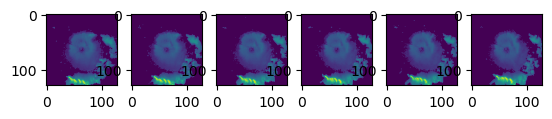

In [36]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 6)

for i in range(len(batch['data'][0])):
    axs[i].imshow(batch['data'][0][i].squeeze())
  
plt.show()

# Models Construction

##### Notes

In [37]:
# 构建多种模型 然后选择其中一种进行训练
# 暂时只做了ConvLSTM ⁉️

##### Dependencies

In [38]:
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as func

##### Functions

##### LSTM

In [39]:
class ConvLSTMCell(nn.Module):
    def __init__(self, shape, input_channel, filter_size, hidden_size):
        super().__init__()
        
        self._shape = shape
        self._input_channel = input_channel
        self._filter_size = filter_size
        self._hidden_size = hidden_size
        self._conv = nn.Conv2d(
            in_channels=self._input_channel + self._hidden_size, 
            # hidden state has similar spational struture as inputs 
            # we simply concatenate them on the feature dimension
            #
            # 注意 该模块的输入 来自前置其它模块 已经并非原始图像 而是一个多通道的
            out_channels=self._hidden_size * 4, 
            # lstm has four gates
            kernel_size=self._filter_size,
            stride=1,
            padding=1
        )
        # convlstmcell只内含一个卷积层 如果觉得太少 可以多层convlstmcell
        # 实际上convlstm=cnn+convlstmcell 它和cnn+lstmcell不同

    # def forward(self, x, state):
    #     _hidden, _cell = state
    #     cat_x = torch.cat([x, _hidden], dim=1) 
    #     Conv_x = self._conv(cat_x)

    #     i, f, o, g = torch.chunk(Conv_x, 4, dim=1)

    #     i = func.sigmoid(i)
    #     f = func.sigmoid(f)
    #     cell = _cell * f + i * func.tanh(g)
    #     o = func.sigmoid(o)
    #     hidden = o * func.tanh(cell)

    #     return hidden, cell

    def forward(self, x, out_0):
    # 完全可以直接传入h_0 c_0 无非就是外面调用该模块时传参方式改变一下
    # 暂时就不做了 ⁉️
        h_0, c_0 = out_0
        cat_x = torch.cat([x, h_0], dim=1) 
        conv_x = self._conv(cat_x)

        i, f, o, g = torch.chunk(conv_x, 4, dim=1)

        i = func.sigmoid(i)
        f = func.sigmoid(f)
        c = f * c_0 + i * func.tanh(g)
        o = func.sigmoid(o)
        h = o * func.tanh(c)

        return h, c

In [40]:
class ConvLSTM(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_pad = 0
        self.conv_kernel_size = 3
        self.conv_stride = 1
        self.pool_pad = 0
        self.pool_kernel_size = 3
        self.pool_stride = 3
        self.hidden_size = 64
        self.size = int(
            (args.img_size[0] + 2 * self.conv_pad - (self.conv_kernel_size - 1) - 1) \
            / self.conv_stride + 1
        )
        self.size1 = int(
            (self.size + 2 * self.pool_pad - (self.pool_kernel_size - 1) - 1) \
            /self.pool_stride + 1
        )
        
        self.conv = nn.Conv2d(
             in_channels=1,
             out_channels=8,
             kernel_size=3,
             stride=1,
             padding=0
        )
        self.pool = nn.MaxPool2d(kernel_size=3)
        self.convlstm1 = ConvLSTMCell(
            shape=[self.size1, self.size1], 
            input_channel=8, 
            filter_size=3,
            hidden_size=self.hidden_size
        )
        self.convlstm2 = ConvLSTMCell(
            shape=[self.size1, self.size1], 
            input_channel=self.hidden_size, 
            filter_size=3,
            hidden_size=self.hidden_size
        )
        self.deconv = nn.ConvTranspose2d(
            in_channels=self.hidden_size, 
            out_channels=1, 
            kernel_size=4, 
            # 对256*256图像是6 对128*128图像是4
            stride=3,
            padding=0, 
            output_padding=1
        )
        self.relu = func.relu

#     def forward(self, X, time_stamps): ###
#         X_chunked = torch.chunk(X, args.n_inputs, dim=1)
#         time_diffs_chunked = torch.chunk(time_diffs, args.n_seq + args.n_inputs, dim=1) ###
#         X = None
#         output = [None] * (args.n_seq)
# #         output = [None] * (args.n_seq + args.n_outputs) ###
#         state_size = [args.batch_size, self.hidden_size] + [self.size1, self.size1]
#         hidden1 = Variable(torch.zeros(state_size)).cuda()
#         cell1 = Variable(torch.zeros(state_size)).cuda()
#         hidden2 = Variable(torch.zeros(state_size)).cuda()
#         cell2 = Variable(torch.zeros(state_size)).cuda()
        
#         for i in range(args.n_inputs):                                  
#             output[i] = self.conv(X_chunked[i])     
#             output[i] = self.pool(output[i])
#             hidden1, cell1 = self.convlstm1(output[i],(hidden1,cell1))
#             hidden2, cell2 = self.convlstm2(hidden1,(hidden2,cell2))
#             output[i] = self.deconv(hidden2)
# #             for j in range(args.batch_size): ###
# #                 output[i][j] += time_diffs_chunked[i].squeeze()[j]
#             output[i] = self.relu(output[i])
        
#         for i in range(args.n_inputs, args.n_seq):
# #         for i in range(args.n_inputs, args.n_seq + args.n_outputs): ###                                               
#             output[i] = self.conv(output[i-1])    
#             output[i] = self.pool(output[i])
#             hidden1, cell1 = self.convlstm1(output[i],(hidden1,cell1))
#             hidden2, cell2 = self.convlstm2(hidden1,(hidden2,cell2))
#             output[i] = self.deconv(hidden2)
# #             for j in range(args.batch_size): ###
# #                 output[i][j] += time_diffs_chunked[i].squeeze()[j]
#             output[i] = self.relu(output[i])
            
#         return output[args.n_inputs:]

    def forward(self, X):
        # ? 关于时间插入在哪 按理来说应该插入在解码器那里 但问题是处理时间要不要和空间分开 放在反卷积的后面 做全连接层
        X_chunked = torch.chunk(X, args.n_inputs, dim=1)
        # 这里为什么要拆 直接遍历第二个维度不行吗 比如 X[:, i, ...]
        # 稍后试一下二者是否等价 毕竟第一种做法拆完应该还需要合上 ⁉️
        X = None
        # 这个应该是在释放内存 
        # 那直接del X不就可以了吗 ⁉️
        output = [None] * args.n_seq
        # 首先生成关于输出的白板 然后再往里挨个填值
        state_size = [args.batch_size, self.hidden_size] + [self.size1, self.size1]
        hidden1 = Variable(torch.zeros(state_size)).cuda()
        cell1 = Variable(torch.zeros(state_size)).cuda()
        hidden2 = Variable(torch.zeros(state_size)).cuda()
        cell2 = Variable(torch.zeros(state_size)).cuda()

        for i in range(args.n_inputs):
            output[i] = self.conv(X_chunked[i])     
            output[i] = self.pool(output[i])
            hidden1, cell1 = self.convlstm1(output[i],(hidden1,cell1))
            hidden2, cell2 = self.convlstm2(hidden1,(hidden2,cell2))

            output[i] = self.deconv(hidden2)
            output[i] = self.relu(output[i])

        for i in range(args.n_inputs, args.n_seq):                                                 
            output[i] = self.conv(output[i-1])    
            output[i] = self.pool(output[i])
            hidden1, cell1 = self.convlstm1(output[i],(hidden1, cell1))
            hidden2, cell2 = self.convlstm2(hidden1,(hidden2, cell2))

            output[i] = self.deconv(hidden2)
            output[i] = self.relu(output[i])

        output = torch.cat(output[args.n_inputs:], dim=1)
        # 输入那里把第二维拆开分着算的输出 所以最后还得把这些输出的第二维给合回去
        
        return output

In [41]:
class GRUCell(nn.Module):
    def __init__(self, shape, input_channel, filter_size, hidden_size):
        super().__init__()
        
        self._shape = shape
        self._input_channel = input_channel
        self._filter_size = filter_size
        self._hidden_size = hidden_size
        self._conv = nn.Conv2d(
            in_channels=self._input_channel + self._hidden_size, 
            # hidden state has similar spational struture as inputs 
            # we simply concatenate them on the feature dimension
            out_channels=self._hidden_size * 3, 
            kernel_size=self._filter_size,
            stride=1,
            padding=1
        )

    def forward(self, x, state):
        _hidden, _cell = state
        cat_x = torch.cat([x, _hidden], dim=1) 
        Conv_x = self._conv(cat_x)

        r, z, h_cand = torch.chunk(Conv_x, 3, dim=1)

        r = func.sigmoid(r)
        z = func.sigmoid(z)
        h = _cell * f + (1 - z) * func.tanh(h_cand)
        o = func.sigmoid(o)
        hidden = o * func.tanh(cell)

        return hidden

# Model Training 

##### Notes

In [42]:
"""
tensorboard怎么启动
不是import tensorboard 也非import tensorboardx
而是from torch.utils.tensorboard import SummaryWriter


"""

'\ntensorboardX怎么启动\n\n'

##### Dependencies

In [43]:
import torch
from torch_ssim import ssim

##### Functions

In [44]:
def save_checkpoint(epoch, model, optimizer, 
    lr_scheduler, best_accuracy):
    
    checkpoint = {
        'epoch': epoch,
        'model_states': model.state_dict(),
        'optimizer_states': optimizer.state_dict(),
        'lr_scheduler_states': lr_scheduler.state_dict(),
        'best_accuracy': best_accuracy,
    }
    # 不要往jupyter自带的.ipynb_checkpoints里面存
    # 这里面的检查点都是自动生成的 (每隔一段时间) 混着往一起存很容易找不着指定的检查点
    # 但说是都以时间戳命名 所以感觉倒也还好 ⁉️
    #
    # 检查点比较类似git之中版本的概念 既能保存markdown 又能保存代码本身及其执行结果
    # 该隐藏文件夹将在打开笔记本时自动生成出来
    #
    # 内核关闭与笔记本关闭 都不触发检查点的自动保存 所以在做出重要改动后 手动保存检查点依然很有必要
    # 其实保存笔记本就是创建检查点 ⁉️
    #
    # vscode对单一笔记本只覆盖保存一个检查点 ⁉️ 但我怎么感觉jupyter也是只存一个
    # 但是由于目前发现在远端上无法保存 所以无法进行验证 找时间换到本机再试试
    # 说是调整下vscode设置就好了 但是我看设置本来就是好的 ⁉️

    # save_dir = args.ckpt_dir
    # torch.save(checkpoint, save_dir)
    # 这么存出来的文件就叫checkpoint
    
    save_path = args.ckpt_dir + f'checkpoint_epoch{epoch}.pth'
    torch.save(checkpoint, save_dir)

In [45]:
def load_checkpoint(ckpt_path):
    
    if ckpt_path:
        ckpt = torch.load(ckpt_path)
        
        start_epoch = ckpt['epoch'] + 1
        # 从中断的下一个epoch再开始继续训练
        best_accuracy = ckpt['best_accuracy']
        
        model_states = ckpt['model_states']
        optimizer_states = ckpt['optimizer_states']
        lr_scheduler_states = ckpt['lr_scheduler_states']
    
    return start_epoch, best_accuracy, \
        model_states, optimizer_states, lr_scheduler_states

In [46]:
def get_devices():
    
    devices = [torch.device(f'cuda:{i}') \
    for i in range(torch.cuda.device_count())] \
    if torch.cuda.is_available() else [torch.device('cpu')]
    
    torch.backends.cudnn.benchmark = True
    # 设置pytorch的cudnn后端 是否自动寻找对当前的输入大小最合适的算法 并保存这些算法以用于下一次输入大小还相同
    # 这一选项适用于网络结构和输入形状都不改变的情况 否则反而将会降低运行效率
    # 若每次迭代都有所变化 cudnn就每次都要重新寻找最优的算法
    # 总而言之需要根据实际情况设置运行模式
    # 
    # 即便本机没有gpu也能进行设置 只不过就是无用功罢了
    
    return devices

In [47]:
def get_model(archi='ConvLSTM', model_path=None, ckpt_states=None):

    assert archi in args.model_archi, \
        f"{archi} is still unavailable."
    # 这还是硬编码 这个元组有待改进 ⁉️
    #
    # python会区分大小写 所以类名怎么设的这里就要怎么来写 
    # 没有必要全变小写进行检测 因为稍后在实例化的时候还是这么用
    
    args.log_dir = f'../log/{archi}'

    assert not (model_path and ckpt_states), \
        f"Only one trained model/checkpoint could be passed in."


    # 载入已训练的模型进行推理 >
    if model_path:
        model = torch.load(model_path)
        print("Reload the best trained model to make inference...")
    
    # 载入检查点 或从头训练 >
    else:
        model = eval(archi)()
        # 实例化一个神经网络类
        # 比如eval("ConvLSTM")()=ConvLSTM()

        if not ckpt_states:
            print(f"Initialize a new model of {archi}...")
        
        else:
            model.load_state_dict(ckpt_states)
            # 从检查点之中恢复模型参数
            # 注意还有其它部分也要恢复 但没放在该函数里
            print(f"Reload the checkpoint to resume training \
            from epoch {checkpoint['epoch']} to epoch {args.n_epoches}...")

    print('---')
    # 此即为各分支的print都额外添加分隔

    return model

In [64]:
%run _1_arguments

In [48]:
def get_loss_fn(loss_type='MSE'):
    """
    Parameters:
    ---
    loss_type: str,
        indicating which evaluation metric is used for training.

    """
    
    assert loss_type in args.criterion, \
        f"{loss_type} is still unavailable."

    loss_fn = eval(loss_type)

    return loss_fn

def MAE():
    return nn.L1Loss()
    # 这里有待深究 总之没()不行
    # https://blog.csdn.net/m13526413031/article/details/116426016 ⁉️

def MSE():
    return nn.MSELoss()

def Smooth_MAE():
    return nn.smooth_l1_loss()

# def LogCosh(output, target):
#     return torch.mean(torch.log(torch.cosh(output - target))) 

def SSIM(output, target):
    '''
    Input:
        should be 5D (samples, channels, frames, heigth, width).
    Return:
        the structural similarity between two matrices. 
        (using only first dimension of channels, so it should have 1 channel to make it work)
    '''
    
#     return ssim(output[:,0,...], target[:,0,...], size_average=1, data_range=1)
    return ssim(output, target, size_average=1, data_range=1)

In [49]:
def get_optimizer(model, ckpt_states=None):
    
    optimizer = torch.optim.Adam(model.parameters(), \
        lr=args.lr, weight_decay=args.wd)
    
    if ckpt_states:
        optimizer.load_state_dict(ckpt_states)

    # LR_step_size = int(max_epochs / lr_steps)
    # gamma = 0.7
    # lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=LR_step_size, gamma=gamma)
    # # 用于调整学习率的函数
    # # 使用StepLR方法 将初始学习率每LR_step_size个epoch就降低一个因子gamma ⁉️
    # # 现在打算用warmup 不用线性的了 而且单开一个函数

    return optimizer

In [50]:
def get_lr_scheduler(optimizer, warmup_epochs, num_epochs, ckpt_states=None):
    
    def lr_lambda(current_epoch):
        if current_epoch < warmup_epochs:
            return float(current_epoch) / float(max(1, warmup_epochs))
        else:
            return 0.8 ** (float(current_epoch - warmup_epochs) / float(max(1, num_epochs - warmup_epochs)))
    
    lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    if ckpt_states:
        optimizer.load_state_dict(ckpt_states)
    
    return lr_scheduler

In [51]:
def get_pred_loss(vl_dataloader, model, criterion, devices, plot_preds=False):
    model.eval()
    loss = 0
    ssim = 0
    
    with torch.no_grad():
        for n_batch, batch_data in enumerate(vl_dataloader):
        # 提取第几批次只是为了计算批量平均误差

            X = batch_data['data'].float().to(devices)
            Y = batch_data['labels'].float().to(devices)
            # 图像数据的数据类型必须匹配网络参数的数据类型 
            # 所以要把uint8转为float32
            # 这点我在构建数据集时就做完了

            output = model(X)
    
            loss += criterion(output, Y)
            # 训练时候 类似SGD 我们是单批量优化参数 而验证时候则是整个验证集
            # 暂时舍弃这种想法
            ssim += SSIM(output, Y) ###
#             for i in range(args.n_outputs):
#                 loss += criterion(pred_list[i].squeeze(), Y[:, i, :, :])
#                 # pred_list是(5, 10, 1, 256, 256) 
#                 # Y是(10, 5, 256, 256)

        # loss /= (n_batch * args.batch_size * args.n_outputs)
        # ssim /= (n_batch * args.batch_size * args.n_outputs)
        loss /= (args.batch_size * args.n_outputs)
        ssim /= (args.batch_size * args.n_outputs)
        
    return loss, ssim

In [52]:
# def _get_params(params_name):
#     '''
#     params_name: 'params_name'
#     '''
#     exec("from {m}.{s} import {f}".format(m='.models.params', s=params_name,  f='params'), globals())
#     # ⁉️
#     return params 

# # 这段代码还没开始改 这是用于读取之前checkpoint参数
# # 这是cuomo写的 ⁉️

In [53]:
# def save_checkpoint(epoch, state_dict(), ):
#     """
#     Discription
#     ---
#     Save the best model having been trained so far.
    
#     Todo
#     ---
#     As shown in *pag. 39, stopping training when validation loss is at the minimum should be the best possible checkpoint. 
#     So, implement stopping when validation loss starts increasing (use histeresis to missinterpretate noise as minimum)
#     You can comment/uncomment the 3 saving in the fx as what suits you best. They are just to reproduce results.
#     """
    
#     if path==None:
#         base_dir = str(Path(__file__).parent.parent.parent)
#         data_dir = "/data/checkpoints/"
#         path = base_dir + data_dir

#     state = {
#         "epoch": epoch + 1,
#         "state_dict": state_dict(),
#         "best_accuracy": vl_loss}
#     torch.save(state, path + self.save_filename)

#     try:
#         torch.save(self.best_model_loss, path + "bestLOSS_" + self.save_filename)
#         #torch.save(self.best_model_ssim, path + "bestSSIM_" + self.save_filename)
#     except:
#         pass
#     filename = self.params["save_filename"].replace("pth","param")
#     with open(path + filename,"wb") as my_file_obj:
#             pickle.dump(self.params, my_file_obj)

In [54]:
# def load_checkpoint(self, params, ckpoint_path=None , cuda=True, verbose=True):
#     '''
#     Load a checkpoint, to make predictions or to resume training.
#     Inputs:
#         params: see Class help
#         ckpoint_path: checkpoint path. 
#             If not given it looks for the checkpoint in mlnowcasting/data/checkpoints/ with the name of the params['save_filename']
#         cuda: if True try to uses GPU
#         verbose: print information
#     '''
#     if not self.model:
#         self.model = self.get_model(params['n_filter'], params['dropout']).float()

#     if not ckpoint_path:
#         base_dir = str(Path(__file__).parent.parent.parent)
#         data_dir = '/data/checkpoints/'
#         path = base_dir + data_dir
#         ckpoint_path = path + params['save_filename']

#     use_gpu = torch.cuda.is_available()
#     if cuda and use_gpu:
#         self.model.cuda()
#         checkpoint = torch.load(ckpoint_path)
#     else:
#         checkpoint = torch.load(ckpoint_path, map_location=torch.device('cpu') )

#     self.model.eval()
#     start_epoch = checkpoint['epoch']
#     best_accuracy = checkpoint['best_accuracy']
#     self.model.load_state_dict(checkpoint['state_dict'])
#     if verbose:
#         print("=> loaded checkpoint '{}' (trained for {} epochs)".format(params['save_filename'], checkpoint['epoch']))

In [55]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('../logs/convlstm')

def run_training(reload=False, ckpt_path=None):
    learning_rates = []

    mse_loss = {'train': [], 'validation': []}
    ssim_loss = {'train': [], 'validation': []}

    if ckpt_path:
        start_epoch, best_accuracy, \
            model_states, optimizer_states, lr_scheduler_states = \
            load_checkpoint(ckpt_path)

        model = get_model(archi='ConvLSTM', ckpt_states=model_states)
        optimizer = get_optimizer(model, ckpt_states=optimizer_states)
        lr_scheduler = get_optimizer(optimizer, ckpt_states=lr_scheduler_states)
        
        # 说实话感觉真的有点蠢 这个封装跟没封装没差多少
        # 暂时不知怎么改进
        
    else:
        start_epoch = 0
        best_accuracy = {'vl_mse': 1000, 'vl_ssim': -1}
        # 初始最佳性能要给设成最不好的数
        model = get_model(archi='ConvLSTM')
        optimizer = get_optimizer(model)
        lr_scheduler = get_lr_scheduler(optimizer, 0.2 * args.n_epoches, args.n_epoches)
    
    tr_dataloader, vl_dataloader, _ = get_dataloaders()
    devices = get_devices()
    criterion = get_loss_fn('MSE')()
    
    # 考虑多卡并行 >
    # 暂不确定把它放在optimizer前面有无什么影响 ⁉️
    if len(devices) > 1:
        model = nn.DataParallel(model, device_ids=devices)
    else:
        devices = devices[0]
        model = model.to(devices) 

    model.train()
    # 暂不确定把它放在optimizer前面有无什么影响 
    # optimizer定义需要model ⁉️
    for epoch in range(start_epoch, args.n_epoches):
        t_elapsed = 0
        t = time.time()
        
        for n_batch, batch_data in enumerate(tr_dataloader, start=1):
            loss = 0
            # 如前所述 训练时需要效仿SGD单批量优化参数 而验证时候则是整个验证集
            # 暂时废弃这一想法
            ssim = 0
            # 同时也把ssim给跑出来 只是为了作图
            
            X = Variable(batch_data['data'].float()).to(devices)
            Y = Variable(batch_data['labels'].float()).to(devices)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, Y)
            # https://blog.csdn.net/m13526413031/article/details/116426016
            loss.backward()
            optimizer.step()
            lr_scheduler.step()

            if n_batch % 100 == 0:
                t_elapsed += (time.time() - t)
                t = time.time()
                
                tr_avg_loss = loss / (args.batch_size * args.n_outputs)
                mse_loss['train'].append(tr_avg_loss)
                ssim += SSIM(output, Y) / (args.batch_size * args.n_outputs)
                ssim_loss['train'].append(ssim)
                
                vl_avg_loss, vl_avg_ssim = get_pred_loss(vl_dataloader=vl_dataloader, 
                    model=model, devices=devices, criterion=criterion)
                mse_loss["validation"].append(vl_avg_loss)
                ssim_loss["validation"].append(vl_avg_ssim)
                
                if vl_avg_loss < best_accuracy["vl_mse"]:
                    # best_accuracy["vl_mse"] = vl_avg_loss
                    # state_dict = copy.deepcopy(model.state_dict())
                    # torch.save(model, f"model_{epoch + 1}_mse.pkl")
                    # best_model_loss = {"epoch": epoch + 1, "state_dict": state_dict, "best_loss": best_vl_loss}

                    if epoch >= 10:
                        # 训练前期没必要存
                        
                        save_checkpoint(epoch, model, optimizer, 
                            best_accuracy, lr_scheduler)
                    
                # if vl_avg_ssim > best_vl_ssim:
                #     best_vl_ssim = vl_avg_ssim
                #     state_dict = copy.deepcopy(model.state_dict())
                #     best_model_ssim = {"epoch": epoch + 1, "state_dict": state_dict, "best_loss": best_vl_ssim} 
                
                print(f"Epoch: {epoch}, Iteration: {n_batch}, Tr_Avg_Loss: {tr_avg_loss:.6f}, Vl_Avg_Loss: {vl_avg_loss:.6f}, Vl_Avg_SSIM: {vl_avg_ssim:.6f}")
                
        print("Finished an epoch...")
        print(f"Elapsed seconds from last epoch: {t_elapsed:.2f}")
        
#         torch.save(model, "model_{0}.pkl".format(epoch)) ###

# Make Predictions

In [56]:
run_training()

Initialize a new model of ConvLSTM...
---


/top/students/UNGRAD/UE/xbai/home/MyApps/Miniconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/top/students/UNGRAD/UE/xbai/home/MyApps/Miniconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0, Iteration: 100, Tr_Avg_Loss: 1.054043, Vl_Avg_Loss: 107.551949, Vl_Avg_SSIM: 0.000828
Epoch: 0, Iteration: 200, Tr_Avg_Loss: 1.038098, Vl_Avg_Loss: 91.752922, Vl_Avg_SSIM: 0.005913
Finished an epoch...
Elapsed seconds from last epoch: 73.86
Epoch: 1, Iteration: 100, Tr_Avg_Loss: 1.071016, Vl_Avg_Loss: 77.822838, Vl_Avg_SSIM: 0.003150
Epoch: 1, Iteration: 200, Tr_Avg_Loss: 0.989037, Vl_Avg_Loss: 71.810089, Vl_Avg_SSIM: 0.007279
Finished an epoch...
Elapsed seconds from last epoch: 71.34
Epoch: 2, Iteration: 100, Tr_Avg_Loss: 0.787157, Vl_Avg_Loss: 65.617348, Vl_Avg_SSIM: 0.011659
Epoch: 2, Iteration: 200, Tr_Avg_Loss: 0.624444, Vl_Avg_Loss: 62.524063, Vl_Avg_SSIM: 0.012666
Finished an epoch...
Elapsed seconds from last epoch: 71.51
Epoch: 3, Iteration: 100, Tr_Avg_Loss: 0.767134, Vl_Avg_Loss: 59.637318, Vl_Avg_SSIM: 0.012033
Epoch: 3, Iteration: 200, Tr_Avg_Loss: 0.683452, Vl_Avg_Loss: 57.649204, Vl_Avg_SSIM: 0.018111
Finished an epoch...
Elapsed seconds from last epoch: 71.22

AttributeError: 'dict' object has no attribute 'state_dict'

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.io import img_tiles

In [ ]:
def get_color_map():
    """
    Discription
    ---
    Customize a color map used for plotting reflectivity values.
    """
    colors = [(255, 255, 255), (164, 140, 177), (83, 2, 125), (49, 0, 199), (0, 0, 255), 
              (5, 101, 134), (10, 182, 18), (105, 170, 18), (255, 255, 0), (255, 213, 0), 
              (253, 169, 2), (255, 84, 0), (255, 0, 0)]  
    # R -> G -> B
    colors = [[each / 255 for each in color] for color in colors]
    # 列表没有广播机制 所以无法直接除一个数
    cmap_name = "darts"
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=13)
    # ? 这个N=13啥意思?

cmap = get_color_map()

In [ ]:
def plot_obs_pred(X, Y, N=args.n_outputs, plot_inputs=False):
#     if plot_inputs:
#         for i in range(args.n_inputs):
#             plt.subplot(1, args.n_inputs, i + 1)
#             plt.imshow(X[0][i], cmap=cmap)
    
    model = torch.load("model_21.pkl")
    output = model(X.float().cuda())
    cmap = get_color_map()
    fig, axes = plt.subplots(nrows=2, ncols=N, figsize=(20, 10))
    
    i = 0
    for ax in axes.flat:
        if i < args.n_inputs:
            img = ax.imshow(Y[0][i], vmin=0, vmax=70, cmap=cmap)
            ax.set_yticklabels([])
            ax.set_xticklabels([])
#             ax.axis("off")
            i += 1
        
        else:
            img = ax.imshow(output[0][i - args.n_inputs].squeeze().detach().cpu(), vmin=0, vmax=70, cmap=cmap)
            ax.set_yticklabels([])
            ax.set_xticklabels([])
#             ax.axis("off")
    
    axes[0,0].set_ylabel("OBS")
    axes[1,0].set_ylabel("PRED")
    
    cbar = fig.colorbar(img, ax=axes.ravel().tolist(), location="bottom", aspect=100)
    cbar.set_label("dbZ", rotation=0)

In [ ]:
# def plot_obs_pred(target, prediction, N=3, cmap='darts', title_files=None):
#     '''
#     Simple plotting of some frames of the target and prediction on a figure with two rows, one for each.
#     N: how many frames of each to plot
#     cmap: colormap. Recommended to use 'darts' or 'binary'.
#     title_files: list of each frame original file to use as titles.
#     '''
#     # define cmap and ranges
#     if cmap == 'darts':
#         cmap = get_cmap()

#     max_ = np.max(target)
#     vmax = 1
#     if max_ > 2:
#         vmax = 70
#     elif max_ > 70:
#         vmax = 255
#     else:
#         vmax = 1
        
#     n_frames = target.shape[0]
#     skip = int(n_frames/N) # how many frames to skip to plot only N frames
#     fig, axes = plt.subplots(nrows=2, ncols=N, figsize=(15,8))
#     i = 0
#     plot_sequence = target # auxiliary variable to use for plotting
#     for ax in axes.flat:
#         # once the target has been plotted, switch to prediction
#         if i == N:
#             plot_sequence = prediction
#             i = 0
#         im = ax.imshow(plot_sequence[i*skip,...],vmin=0, vmax=vmax, cmap=cmap)
#         if title_files is not None:
#             ax.set_title(get_title(title_files, i*skip))
#         #ax.axis('off')
#         ax.set_yticklabels([])
#         ax.set_xticklabels([])
#         i += 1
        
#     axes[0,0].set_ylabel('OBS')
#     axes[1,0].set_ylabel('PRED')
#     # show the colorbar at the bottom horizontally
#     cbar = fig.colorbar(im, ax=axes.ravel().tolist(), location='bottom', aspect=100)
#     cbar.set_label('dbZ', rotation=0)
#     fig.show()
#     plt.show()
#     #fig.tight_layout()
#     return fig

In [ ]:
_, _, tt_dataloader = get_dataloaders()
for n_batch, b_data in enumerate(tt_dataloader):
    X = b_data["data"]
    Y = b_data["labels"]
    break

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(args.n_inputs):
    plt.subplot(1, args.n_inputs, i + 1)
    plt.imshow(X[0][i], cmap=cmap)

In [ ]:
# plt.figure(figsize=(20, 10))
# for i in range(args.n_inputs):
#     plt.subplot(1, args.n_inputs, i + 1)
#     plt.imshow(X[0][i], vmin=0, vmax=70, cmap=cmap)

In [ ]:
plot_obs_pred(X, Y, N=args.n_outputs, plot_inputs=False)

In [ ]:
import torch